# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xlrd
import matplotlib.pyplot as plt
import sys

sys.path.append('../src')

from data_management import load_data, clean_data, train_data_split, undo_scaling
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
def plot_trend_economic_factor_war(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }

    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    df = df.resample('Y').ffill()
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle('GDP Changes Over Time During Wars', fontsize=18) 
    ax.plot(df.index, df['GDP'], marker='o', linestyle='-', color='blue')
    ax.set_title('GDP Trends')
    ax.set_xlabel('Date')
    ax.set_ylabel('GDP')
    ax.grid(True)
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        ax.axvspan(start, end, color='red', alpha=0.3)

    plt.tight_layout()
    plt.show()


In [37]:
economic_data=load_data('../data/war_final.csv')
economic_data_cleaned=clean_data(economic_data)

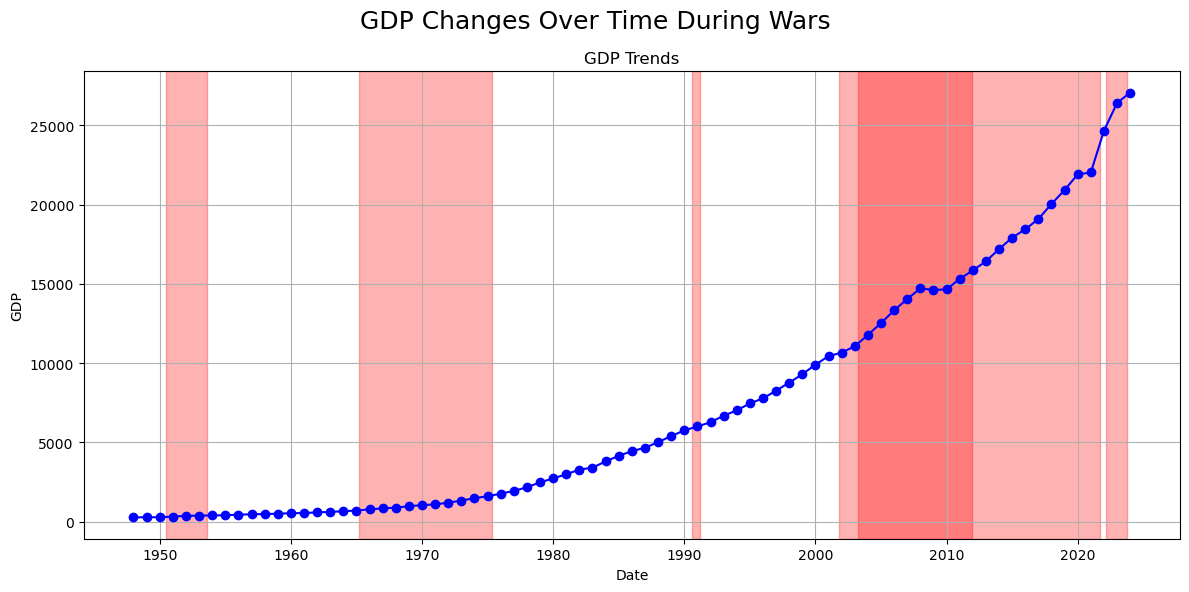

In [38]:
economic_factor_df = economic_data_cleaned[['GDP']].copy()
plot_trend_economic_factor_war(economic_factor_df)

### Analysis Of GDP For Various War to detect it's trend

In [39]:
gdp_df = economic_data_cleaned[['GDP']].copy()
gdp_df.head()

,GDP
Quarter,
1947-03-31,243.164
1947-06-30,245.968
1947-09-30,249.585
1947-12-31,259.745
1948-03-31,265.742


In [40]:
def gdp_plot_wars(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")
    }
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.set_index('Quarter', inplace=True)
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
    axes = axes.flatten()
    for ax, (war, (start, end)), color in zip(axes, war_periods.items(), colors):
        war_period_df = df.loc[start:end]
        ax.plot(war_period_df.index, war_period_df['GDP'], marker='o', color=color)
        ax.set_title(f'GDP Changes During {war}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Gross Domestic Product')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

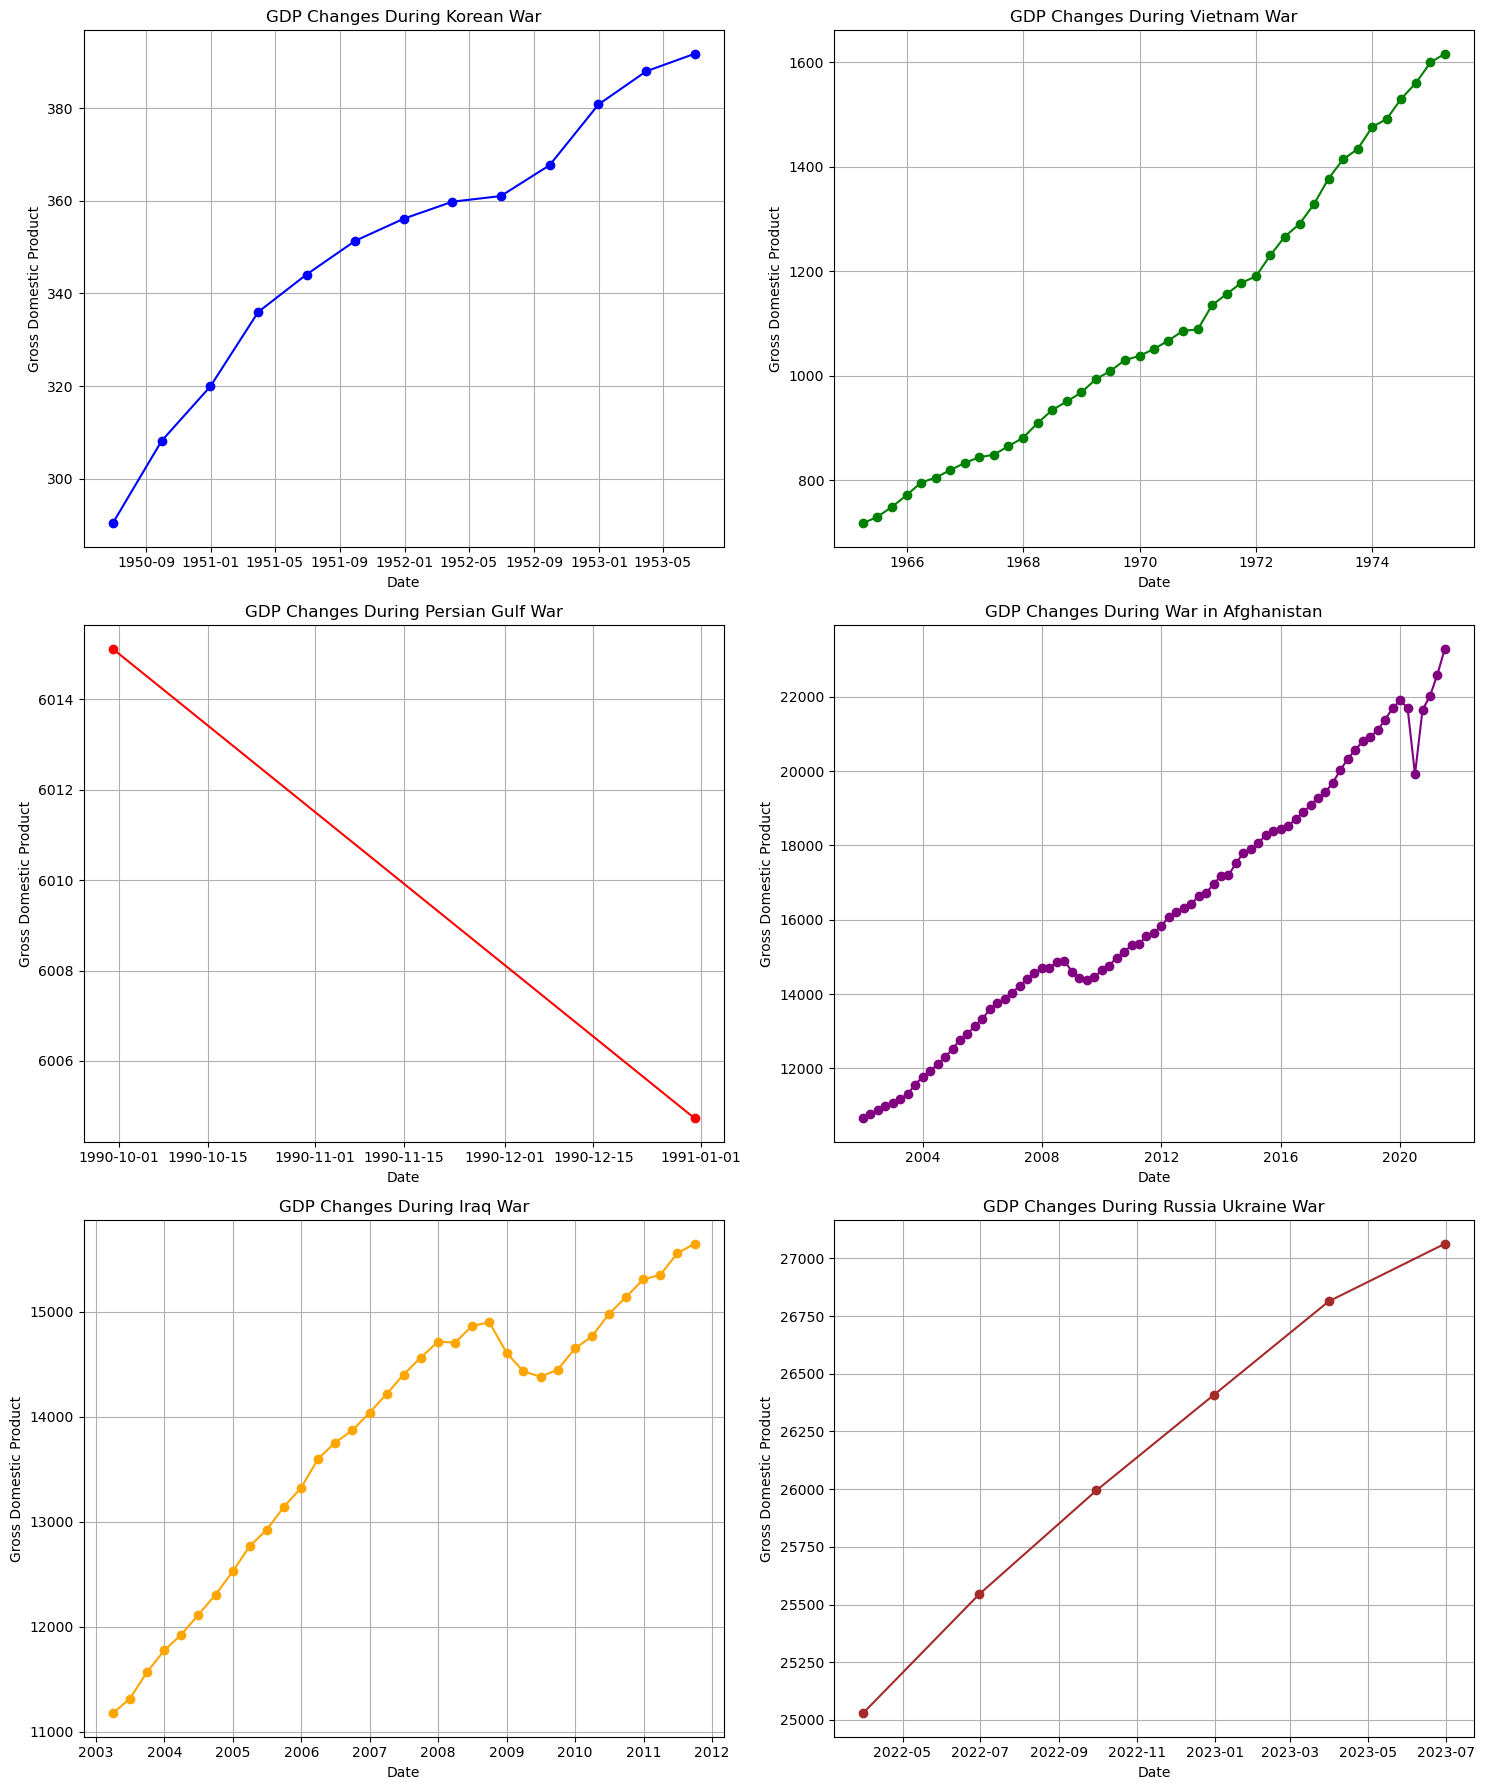

In [41]:
gdp_df = economic_data_cleaned[['GDP']].copy()
gdp_plot_wars(gdp_df)

### How different factors varies during war

In [42]:
from sklearn.preprocessing import StandardScaler
def plot_trend_factors_war(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    war_mask = pd.Series(False, index=df.index)
    for start, end in war_periods.values():
        war_mask |= (df.index >= pd.to_datetime(start)) & (df.index <= pd.to_datetime(end))

    war_data = df[war_mask]
    war_data = war_data.resample('Y').ffill()
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(war_data)
    scaled_df = pd.DataFrame(scaled_data, columns=war_data.columns, index=war_data.index)
    
    plt.figure(figsize=(15, 10))
    for column in scaled_df.columns:
        plt.plot(scaled_df.index, scaled_df[column], label=column)

    plt.legend()
    plt.title('Trends of Economic Factors During War Periods (Standardized Scale)')
    plt.xlabel('Year')
    plt.ylabel('Factors Value In Standard Scale')
    
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        start_year, end_year = start.year, end.year
        if any(scaled_df.index.year == start_year) and any(scaled_df.index.year == end_year):
            start_idx = scaled_df.index.year.tolist().index(start_year)
            end_idx = scaled_df.index.year.tolist().index(end_year)
            plt.axvspan(scaled_df.index[start_idx], scaled_df.index[end_idx], color='red', alpha=0.05)


    plt.show()


### Bar Plot To show GDP change quarter by quarter For each year during war

In [43]:
def plot_bar(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)
    war_gdp = pd.DataFrame()
    war_gdp['pct_change'] = df['GDP'].pct_change() * 100
    war_gdp['year'] = df.index.year
    war_gdp['quarter'] = df.index.quarter
    plot_data = war_gdp.groupby(['year', 'quarter'])['pct_change'].mean().unstack()
    fig, ax = plt.subplots(figsize=(18, 8)) 
    plot_data.plot(kind='bar', stacked=True, colormap='plasma', ax=ax)
    ax.set_title('Quarterly GDP Percentage Change During War Periods')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage Change')
    plt.xticks(rotation=45, ha='right')
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data.index, fontsize=10) 
    quarter_labels = ['Quarter ' + str(q) for q in plot_data.columns]
    ax.legend(quarter_labels, loc='upper right')
    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        start_year, end_year = start.year, end.year
        if start_year in plot_data.index and end_year in plot_data.index:
            start_idx = plot_data.index.tolist().index(start_year)
            end_idx = plot_data.index.tolist().index(end_year) + 1
            ax.axvspan(start_idx, end_idx, color='red', alpha=0.1)

    plt.show()


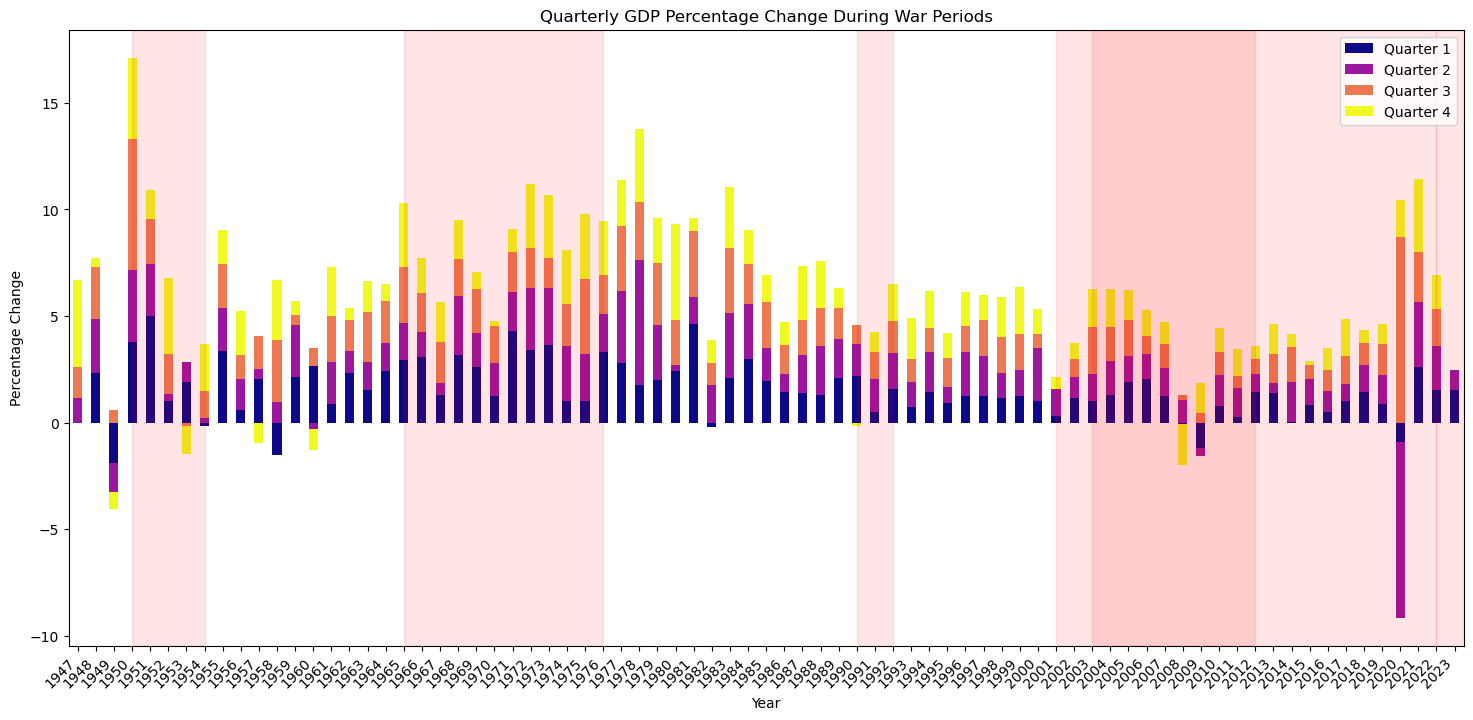

In [44]:
gdp_df = economic_data_cleaned[['GDP']].copy()
plot_bar(gdp_df)


In [45]:
def plot_war_no_war_bar(df):
    war_periods = {
        "Korean War": ("1950-06-25", "1953-07-27"),
        "Vietnam War": ("1965-03-08", "1975-04-30"),
        "Persian Gulf War": ("1990-08-02", "1991-02-28"),
        "War in Afghanistan": ("2001-10-07", "2021-08-30"),
        "Iraq War": ("2003-03-20", "2011-12-18"),
        "Russia Ukraine War": ("2022-02-24", "2023-09-30")  
    }
    df.reset_index(inplace=True)
    df['Quarter'] = pd.to_datetime(df['Quarter'])
    df.rename(columns={'Quarter': 'Date'}, inplace=True)
    df.set_index('Date', inplace=True)

    growth_rates = []
    periods = []
    colors = []

    last_date = df.index.min()

    for war, period in war_periods.items():
        start, end = pd.to_datetime(period[0]), pd.to_datetime(period[1])
        
        if last_date < start:
            initial_gdp = df.loc[df.index >= last_date, 'GDP'].iloc[0]
            final_gdp = df.loc[df.index < start, 'GDP'].iloc[-1]
            num_years = (start - last_date).days / 365.25

            if initial_gdp != 0 and num_years != 0:
                growth_rate = (final_gdp / initial_gdp) ** (1 / num_years) - 1
                growth_rates.append(growth_rate * 100)  
                periods.append(f"{last_date.year}-{start.year} (Non-War)")
                colors.append('green')

        initial_gdp = df.loc[df.index < start, 'GDP'].iloc[-1]
        final_gdp = df.loc[df.index <= end, 'GDP'].iloc[-1]
        num_years = (end - start).days / 365.25

        if initial_gdp != 0 and num_years != 0:
            growth_rate = (final_gdp / initial_gdp) ** (1 / num_years) - 1
            growth_rates.append(growth_rate * 100)  
            periods.append(f"{war}")
            colors.append('red')

        last_date = end 

 
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(periods, growth_rates, color=colors)
    ax.set_title('Average Annual GDP Growth Rates During War and Non-War Periods')
    ax.set_ylabel('Growth Rate (%)')
    ax.set_xlabel('Periods')
    plt.xticks(rotation=45)
    plt.show()



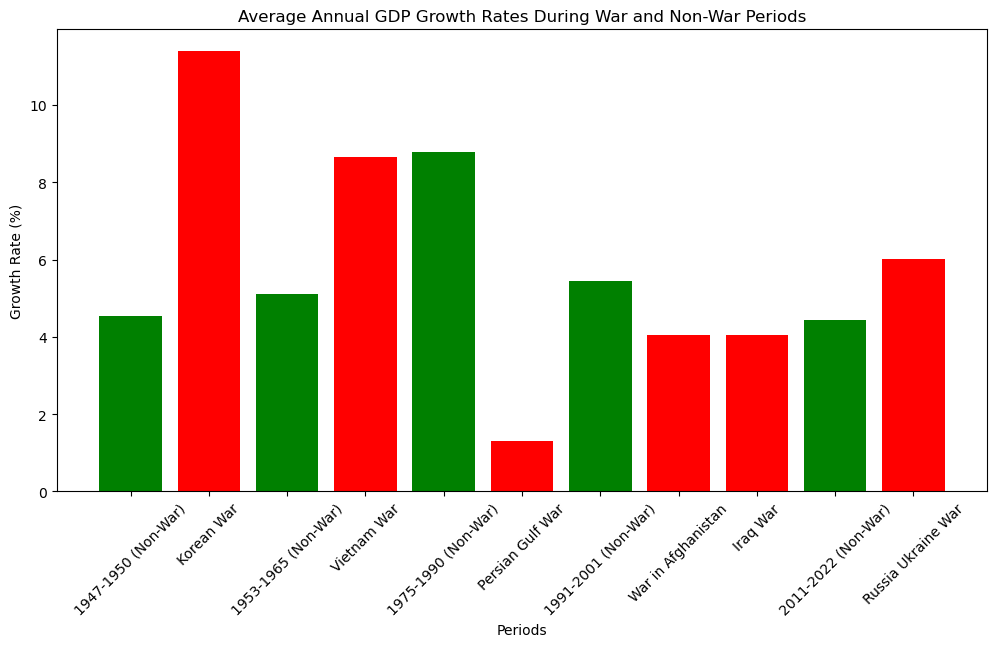

In [46]:
annualized_gdp_df = economic_data_cleaned[['GDP']].copy()
plot_war_no_war_bar(annualized_gdp_df)